# Lab 4: Numeric Derivatives Part II

In this set of lab activities, we will investiate a set of data collected from a mass-spring system. Remember that we have the following equations that can describe a mass spring system:

$$
F_{sp} = - kx
$$

and

$$
U_{sp} = \frac{1}{2} kx^2
$$

We will use both of these in approaches to better characterize the data that has been collected. 

## Activity 1: An Ideal Mass Spring System 

In this first activity, we will consider data from an 'ideal' mass spring system that does not contain noise (Note this is not real experimental data that will always contain noise, but it has been generated via other means for our purposes here)

First, import functions and load in data

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load in dataset 1
data1=np.loadtxt('Mass_Spring_Ideal.csv',delimiter=',') #replace with your path to the appropriate .csv file

#determine shape of data
np.shape(data1)

(501, 2)

The data contains two colums, the first is time in seconds, the second is x position in meters

In [4]:
t = data1[:,0] #unpack time data
x = data1[:,1] #unpack position data

Let's plot and examine the data

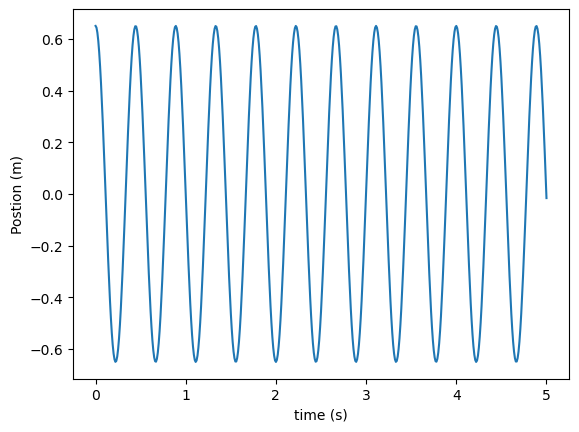

In [5]:
plt.figure()

plt.plot(t,x,label='x(t)')

#plt.legend()

plt.ylabel('Postion (m)')
plt.xlabel('time (s)')

plt.show()

We will want to take derivatives of this function to get velocity and acceleration for the system. 

In [6]:
# Define central difference function -  Take a look at the code to verify that it does what you'd expect
def CentralDiff(x,y): 
    h=x[1]-x[0] #find h based on delta x of data points
    forward = np.roll(y,-1) #forward step
    backward = np.roll(y,+1) #backward step
    dycd=(forward-backward)/(2*h) #perform difference
    dycd=dycd[1:-1] #trim boundaries
    dxcd=x[1:-1] #trim boundaries
    return dxcd, dycd #return the array of the central difference values

In [7]:
# Define 2nd derivative central difference function - Take a look at the code to verify that it does what you'd expect
def CDiff_d2f(x,y): 
    h=x[1]-x[0] #find h based on delta x of data points
    forward = np.roll(y,-1) #forward step
    backward = np.roll(y,+1) #backward step
    d2f = (forward - 2 * y + backward) / h**2 #2nd derivative approximation
    d2f=d2f[1:-1] #trim boundaries
    dx=x[1:-1] #trim boundaries
    return dx, d2f #return the array of 2nd derivative values

In [8]:
# run central difference to get velocity and corresponding time array
t_v,v=CentralDiff(t,x)

# run 2nd derivative central difference to get acceleration and corresponding time array
t_a,a=CDiff_d2f(t,x)

Plot the results

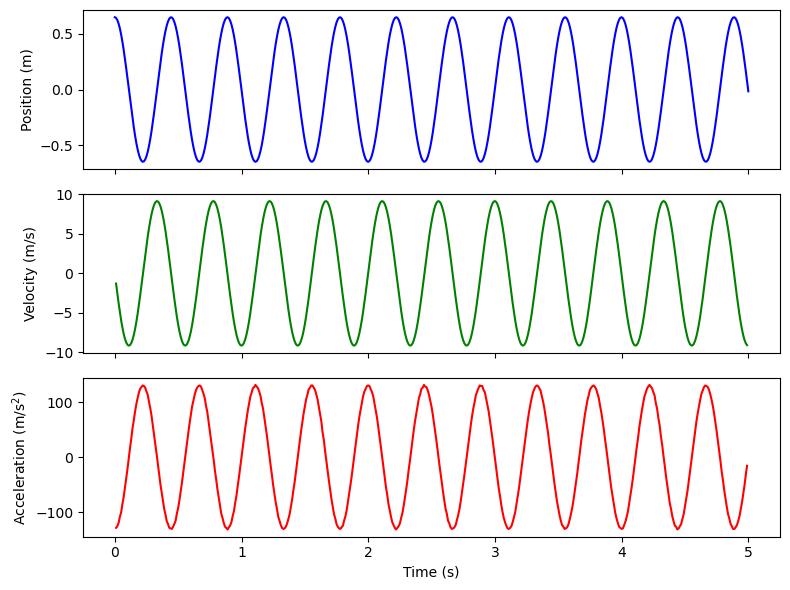

In [9]:
#we'll use subplots here to make the data easier to see. If plotted together the accelration is much larger amplitude than position. 
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 6))

axs[0].plot(t,x, color='blue')
axs[0].set_ylabel('Position (m)')

axs[1].plot(t_v,v, color='green')
axs[1].set_ylabel('Velocity (m/s)')


axs[2].plot(t_a,a, color='red')
axs[2].set_ylabel(r'Acceleration (m/s$^2$)')
axs[2].set_xlabel('Time (s)') 

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

From this we can see that we have the expected behavior in terms of phase. Both position and acceleration are matched in phase, while velocity is out of phase. 

Now let's see if we can determine the spring constant value 'k' from the data. Recall that $F=ma$ and $F=-kx$. 

In [10]:
# for the experiment, our object mass was 350 g
mass = 0.350

# define force
Force = mass * a

Now let's make a plot of Force vs position 

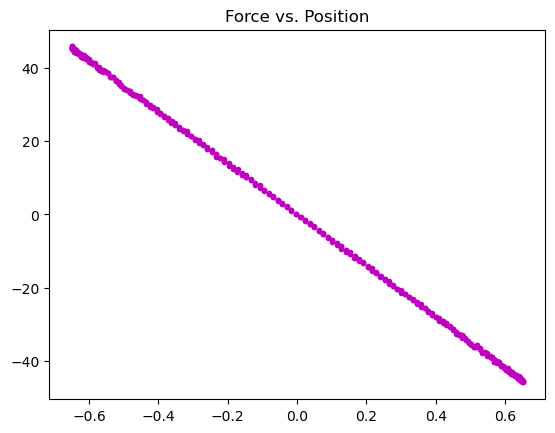

In [11]:
plt.figure()
plt.title('Force vs. Position')
plt.plot(x[1:-1],Force,'.m') #note the x array must be trimmed to match the length of Force
plt.show()

Note the linear relationship, which is expected! Our value of 'k' is equal to the negative slope. Let's determine that next!

In [12]:
# Numpy has a handy curve fitting routine for polynomials we will use here. 
coefs = np.polyfit(x[1:-1],Force, 1) #feed it the plotted values. The last argument says fit it as a linear function

# Extract the slope and intercept
slope = coefs[0]
intercept = coefs[1]

# get the determined k value
k_exp=-1*slope

print(f"The spring constant derived from the data is: {k_exp:.2f}")

The spring constant derived from the data is: 69.88


The actual spring constant was 70 N/m. How close were we?

In [13]:
#determine percent difference from expected value
k_actual=70

k_err=np.abs(k_exp-k_actual)/k_actual*100

print(f"The percent difference in the spring constant is: {k_err:.2f} %")

The percent difference in the spring constant is: 0.17 %


Now, what about energy conservation?

In [14]:
# define kinetic energy based on velocity 
E_kinetic = 0.5 * mass * v**2

# define potential energy based on x and our determined 'k' value
E_potential = 0.5 * k_exp * x**2

# combine results to total energy
E_total = E_kinetic + E_potential[1:-1] #note we have to trim E_potential a bit to match the len of E_kinetic

Plot the results

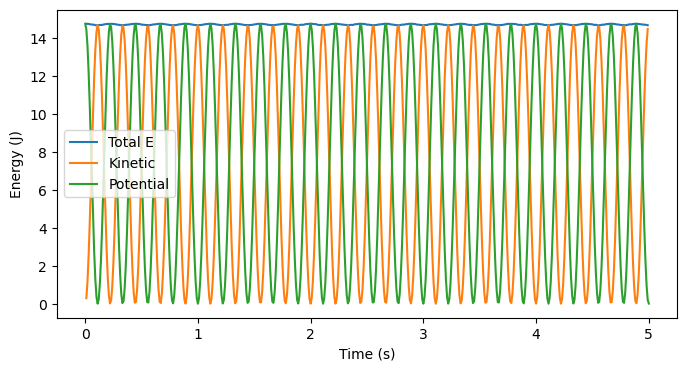

In [15]:
plt.figure(figsize=(8,4))
plt.plot(t_v,E_total,label='Total E')
plt.plot(t_v,E_kinetic,label='Kinetic')
plt.plot(t,E_potential,label='Potential')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()
plt.show()

Note the behavior of E_total is not exactly as expected because it has 'wiggles' rather than being constant. Don't worry, this is just the impact of rounding errors in this sort of approach!

In [16]:
# let's determine system energy by taking the average
Eavg=np.mean(E_total)

# determine the scatter in energy via the standard deviation
Estd=np.std(E_total)

# print the energy with an error bar based on the scatter
print(f"The Total Energy: {Eavg:.2f} +/- {Estd:.2f} J")


The Total Energy: 14.73 +/- 0.03 J


## Activity 2: A Mass Spring System with Realistic Noise

In this activity, we will consider data a more realistic dataset that has measurment noise included. 

In [23]:
#load in the new data set
#load in dataset 2
data2=np.loadtxt('Mass_Spring_Noise.csv',delimiter=',') #replace with your path to the appropriate .csv file

#unpack the data
t = data2[:,0]
x = data2[:,1]


Plot the data x vs t

<function matplotlib.pyplot.show(close=None, block=None)>

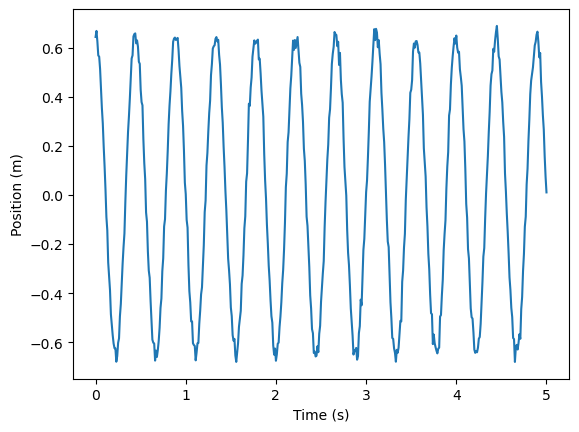

In [24]:
### Add your code here

plt.figure
plt.plot(t,x, label='x(t)')
plt.ylabel('Position (m)')
plt.xlabel('Time (s)')
plt.show






Next, we will want to determine the derivatives of x(t) to find v(t) and a(t). We will repeat the steps as done in activity #1

In [25]:
# run central difference to get velocity and corresponding time array
t_v,v=CentralDiff(t,x)

# run 2nd derivative central difference to get acceleration and corresponding time array
t_a,a=CDiff_d2f(t,x)

Plot the results. What do you notice here?

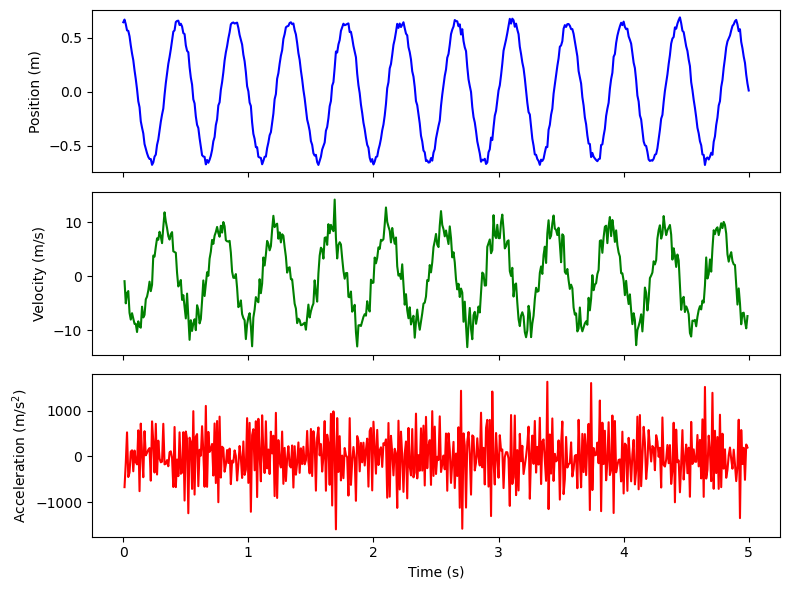

In [26]:
#we'll use subplots here to make the data easier to see. If plotted together the accelration is much larger amplitude than position. 
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 6))

axs[0].plot(t,x, color='blue')
axs[0].set_ylabel('Position (m)')

axs[1].plot(t_v,v, color='green')
axs[1].set_ylabel('Velocity (m/s)')


axs[2].plot(t_a,a, color='red')
axs[2].set_ylabel(r'Acceleration (m/s$^2$)')
axs[2].set_xlabel('Time (s)') 

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

Punchline - even small noise almost completely obliterates the 2nd derivative in this form... How can we fix it? Lets revisit smoothing!

In [27]:
#define a smoothing function
def smooth(x,n,wrap=False):
    A=np.zeros((n,len(x)))
    for i in range(0,n):
        A[i]=np.roll(x,i)
    sdata=np.mean(A,axis=0)
    if wrap==True:
        sdata=np.roll(sdata,np.int32(-n/2)) #wrap data if appropriate
    else:
        sdata=sdata[n:-n] #trim returned data if not wrap
    return sdata

Try smoothing data before taking derivatives. Also, we will take two first order derivatives rather than the single 2nd order step, which is heavily impacted by noise

In [28]:
#perform smoothing
xsmooth=smooth(x,11)

# do centeral difference. Note we will have some trimming required due to smoothing function (no wrapping assumed here)
t_v,v=CentralDiff(t[11:-11],xsmooth)

#perform smoothing
vsmooth=smooth(v,11)

# do centeral difference. Note we will have some trimming required due to smoothing function (no wrapping assumed here)
t_a,a=CentralDiff(t_v[11:-11],vsmooth)

Plot the updated results with the smoothed functions

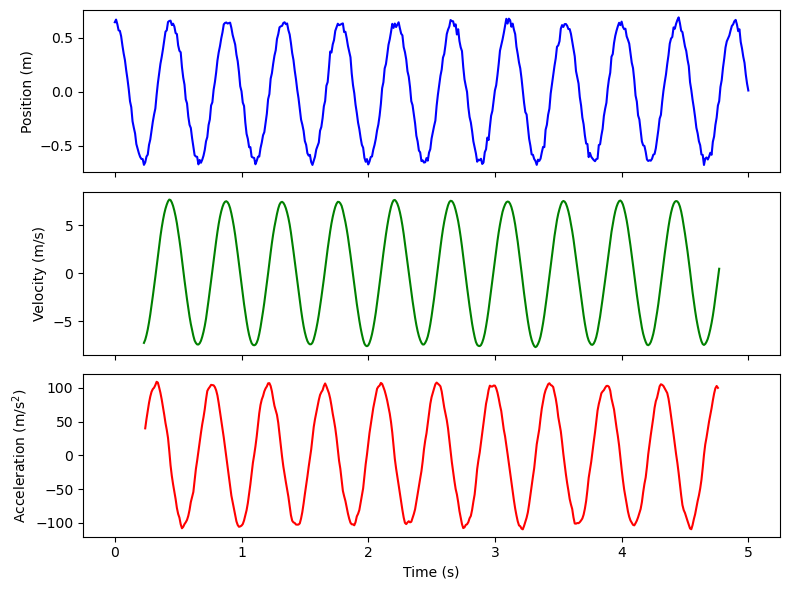

In [29]:
#we'll use subplots here to make the data easier to see. If plotted together the accelration is much larger amplitude than position. 
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(8, 6))

axs[0].plot(t,x, color='blue')
axs[0].set_ylabel('Position (m)')

axs[1].plot(t_v[11:-11],vsmooth, color='green')
axs[1].set_ylabel('Velocity (m/s)')


axs[2].plot(t_a,a, color='red')
axs[2].set_ylabel(r'Acceleration (m/s$^2$)')
axs[2].set_xlabel('Time (s)') 

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

Note the acceleration data now appears much more reasonable! We have lost some data on the edges, but this is unavoidable sometimes!

Next steps:

 - Determine the spring constant using the methods from activty #1
 - Look at energy conservation and determine the impact of noise on determining total energy

In [ ]:
# Add code and cells below as needed